Topic Modelling

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import gensim
import gensim.corpora as corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data_files/news_articles.csv")

In [3]:
data.head()

,id,title,content
0,25626,"One Weight-Loss Approach Fits All? No, Not Eve...","Dr. Frank Sacks, a professor of nutrition at H..."
1,19551,South Carolina Stuns Baylor to Reach the Round...,South Carolina’s win over Duke was not only ...
2,25221,"U.S. Presidential Race, Apple, Gene Wilder: Yo...",(Want to get this briefing by email? Here’s th...
3,18026,"His Predecessor Gone, Gambia’s New President F...","BANJUL, Gambia — A week after he was inaugu..."
4,21063,‘Harry Potter and the Cursed Child’ Goes From ...,The biggest book of the summer isn’t a blockbu...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       100 non-null    int64 
 1   title    100 non-null    object
 2   content  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
articles = data['content']

In [6]:
articles = articles.str.lower().apply(lambda x: re.sub(r"([^\w\s])", "", x))
en_stopwords = stopwords.words('english')
articles = articles.apply(lambda x: ' '.join([word for word in x.split() if word not in en_stopwords]))
articles = articles.apply(lambda x: word_tokenize(x))
ps = PorterStemmer()
articles = articles.apply(lambda tokens: [ps.stem(token) for token in tokens])

In [7]:
articles

0     [dr, frank, sack, professor, nutrit, harvard, ...
1     [south, carolina, win, duke, surpris, fan, pos...
2     [want, get, brief, email, here, good, even, he...
3     [banjul, gambia, week, inaugur, anoth, countri...
4     [biggest, book, summer, isnt, blockbust, thril...
                            ...                        
95    [want, get, brief, email, here, good, even, he...
96    [tallinn, estonia, guard, brought, ahm, abdul,...
97    [gov, scott, walker, wisconsin, activ, wiscons...
98    [social, media, shook, emot, headlin, shout, n...
99    [moment, joanna, acevedo, first, set, foot, bo...
Name: content, Length: 100, dtype: object

In [8]:
dictionary = corpora.Dictionary(articles)

In [9]:
print(dictionary)

Dictionary<8693 unique tokens: ['10', '100', '108', '15', '155']...>


In [10]:
doc_term = [dictionary.doc2bow(text) for text in articles]
doc_term

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 1),
  (16, 1),
  (17, 2),
  (18, 1),
  (19, 1),
  (20, 3),
  (21, 3),
  (22, 1),
  (23, 3),
  (24, 2),
  (25, 4),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 2),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 2),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 2),
  (57, 6),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 4),
  (62, 2),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 5),
  (71, 4),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 2),
  (76, 2),
  (77, 1),
  (78, 2),
  (79, 2),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 4),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 3),
  (88, 1),
  (89, 3),
  (90, 1),
  (91, 2)

In [11]:
num_of_topics = 2

In [12]:
lda_model = gensim.models.LdaModel(corpus=doc_term, id2word=dictionary, num_topics=num_of_topics)

In [14]:
lda_model.print_topics(num_topics=num_of_topics, num_words=5)

[(0,
  '0.020*"mr" + 0.015*"said" + 0.007*"trump" + 0.005*"state" + 0.004*"would"'),
 (1, '0.015*"said" + 0.013*"mr" + 0.005*"would" + 0.005*"year" + 0.004*"one"')]

In [18]:
lsamodel = LsiModel(doc_term, num_topics=num_of_topics, id2word=dictionary)


In [19]:
print(lsamodel.print_topics(num_topics=num_of_topics, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"')]


In [22]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics+1):
    model = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=num_topics_i, random_seed=0)
    model_list.append(model)
    coherence_model = CoherenceModel(model=model, texts=articles,dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_values.append(coherence_score)

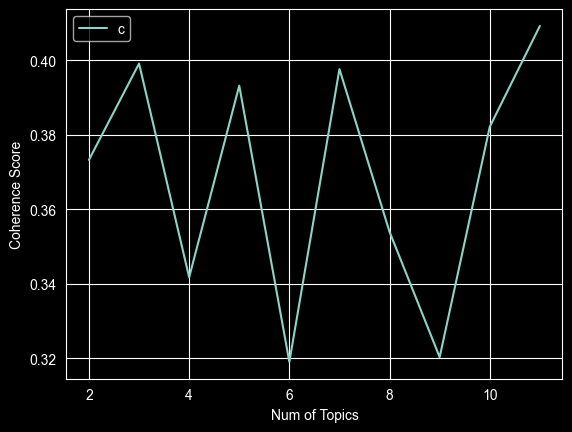

In [28]:
plt.plot(range(min_topics, max_topics + 1), coherence_values)
plt.xlabel("Num of Topics")
plt.ylabel("Coherence Score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [29]:
final_n_topic = 3
lasmodel_f = LsiModel(corpus=doc_term, id2word=dictionary, num_topics=final_n_topic)

In [30]:
print(lasmodel_f.print_topics(num_topics=final_n_topic, num_words=5))

[(0, '0.615*"mr" + 0.429*"said" + 0.187*"trump" + 0.130*"state" + 0.119*"would"'), (1, '-0.537*"mr" + -0.319*"trump" + 0.286*"said" + 0.242*"saudi" + 0.142*"weight"'), (2, '0.460*"saudi" + 0.264*"taliban" + -0.249*"weight" + 0.194*"afghanistan" + -0.191*"dr"')]
